In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
def zRot(theta):
    rotmat = np.array(
        [ 
            np.cos(theta),
            np.sin(theta),
            0, 
            -np.sin(theta),
            np.cos(theta),
            0, 
            0,
            0,
            1
        ]
    ).reshape(3,3)
    return rotmat

def yRot(theta):
    rotmat = np.array(
        [
            np.cos(theta),
            0,
            np.sin(theta),
            0,
            1,
            0,
            -np.sin(theta),
            0,
            np.cos(theta)
        ]
    ).reshape(3,3)
    
    return rotmat

def xRot(theta):
    rotmat = np.array(
        [
            1,
            0,
            0,
            np.cos(theta),
            np.sin(theta),
            0, 
            -np.sin(theta), 
            np.cos(theta),
            0
        ]
    ).reshape(3,3)
    
    return rotmat

In [3]:
def ringMaker(d, N, rotmat, xshift = False, yshift = False, zshift = False):
    """ function to make rings of a specified size
    parameters:
    d: float
        the distance between nodes of the ring
    rotmat: func
        the rotation matrix function to implement (axis orthogonal to plane of 
        ring)
    shifts: bool
        shifts the ring by its radius in the positive direction
    plots: bool
        plot the 2d ring positions
    write: bool
        write the ring positions into an xyz file
    fname: str
        name of the file output. SHOULD INCLUDE THE FILENAME EXTENSION (.xyz) 
    """
    # distance between clusters
    # angle between clusters:
    theta = 2*np.pi/N
    # radius of each ring:
    r = N*d/(2*np.pi)

    p = np.zeros((N, 3))
    p[:, :] = [-r, 0, 0]

    # calc angles to rotate initial ring position about the given axis
    angles = np.arange(0, N)*theta

    # iterate through all nodes and generate positions by rotation
    for i in range(N):
        theta_i = angles[i]
        rot = rotmat(theta_i)
        p[i, :] = np.dot(rot, p[i, :])

    # translate the ring by shift
    if xshift:
        p[:, :] += [xshift, 0, 0]
    if yshift:
        p[:, :] += [0, yshift, 0]
    if yshift:
        p[:, :] += [0, 0, zshift ]
    return p 

def visualize_ring(p,xyPlot=False,yzPlot=False,xzPlot=False):
    if xyPlot:
        # plot the xy dimensions of the large ring
        plt.scatter(p[:, 0], p[:, 1])
        plt.ylabel("y-axis")
        plt.xlabel("x-axis")
        plt.title("Position of nodes")
        plt.show()
        plt.close()

    if yzPlot:
        # plot the xy dimensions of the large ring
        plt.scatter(p[:, 1], p[:, 2])
        plt.ylabel("y-axis")
        plt.xlabel("z-axis")
        plt.title("Position of nodes")
        plt.show()
        plt.close()

    if xzPlot:
        # plot the xy dimensions of the large ring
        plt.scatter(p[:, 0], p[:, 2])
        plt.ylabel("y-axis")
        plt.xlabel("z-axis")
        plt.title("Position of nodes")
        plt.show()
        plt.close()


def visualize_rings(rings,xyPlot=False,yzPlot=False,xzPlot=False):
    plt.figure()
    ax = plt.axes(projection='3d')
    for ring in rings:
        ax.scatter3D(ring[:,0], ring[:,1],ring[:,2], cmap='Greens')
        ax.plot3D(ring[:,0], ring[:,1],ring[:,2])
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.set_xlim([-30,30])
    ax.set_ylim([-30,30])
    ax.set_zlim([-30,30])
    ax.set_title("Initial positions of Catenane Molecules")
    

In [72]:
def write_pdb(molecule_coordinate_sets,fname,description,res_names):
    #molecule_coordinate_sets Is a list of matrices containing coordinates
    #res_names is a list of the residue names
    #fname is the file name to write to
    #description is a description of the file contents
    
    pdb_headers = [
            "Record", #1
            "Atom Number",#2
            "Atom Name",#3
            "Alternate location indicator",#4
            "residue name",#5
            "Chain",#6
            "Residue Sequence Number",#7
            "Code for insertions of residue",#8
            "x",#9
            "y",#10
            "z",#11
            "occupancy",#12
            "temperature factor", #13
            "element symbol", #14
            "charge of atom" #15
        ]
    atom_start_index = 0
    res_sequence_number = 1
    full_pdb_df = pd.DataFrame(columns = pdb_headers)

    for i,molecule_coordinate_set in enumerate(molecule_coordinate_sets):
        n_atoms = np.shape(molecule_coordinate_set)[0]
        res_name = res_names[i]
        

        #Creating dataframe object containing all pdb formatting 
        pdb_df = pd.DataFrame(columns = pdb_headers)
        pdb_df["Record"] = ["HETATM" for i in range(atom_start_index,atom_start_index+n_atoms)] #string
        pdb_df["Atom Number"] = [i +1 for i in range(atom_start_index,atom_start_index+n_atoms)] #int
        pdb_df["Atom Name"] = [f"C{i+1}" for i in range(atom_start_index,atom_start_index+n_atoms)] #string
        pdb_df["Alternate location indicator"] = ["" for i in range(atom_start_index,atom_start_index+n_atoms)] #string
        pdb_df["residue name"] = [f"{res_name}" for i in range(atom_start_index,atom_start_index+n_atoms)] #string
        pdb_df["Chain"] = ["A" for i in range(atom_start_index,atom_start_index+n_atoms)] #string
        pdb_df["Residue Sequence Number"] = [res_sequence_number for i in range(n_atoms)] #int
        pdb_df["Code for insertions of residue"] = ["" for i in range(n_atoms)] #string
        pdb_df["x"] = molecule_coordinate_set[:,0] #float
        pdb_df["y"] = molecule_coordinate_set[:,1] #float
        pdb_df["z"] = molecule_coordinate_set[:,2] #float
        pdb_df["occupancy"] = [1 for i in range(n_atoms)] #float
        pdb_df["temperature factor"] = [0 for i in range(n_atoms)] #float
        pdb_df["element symbol"] = ["C" for i in range(n_atoms)]
        pdb_df["charge of atom"] = ["" for i in range(n_atoms)]
        
        if len(molecule_coordinate_sets) >1:
            atom_start_index += n_atoms
            res_sequence_number += 1
        
        full_pdb_df = pd.concat([full_pdb_df, pdb_df], axis=0)
    #extracting data values for file writing
    data = full_pdb_df.values
    
    
    #writing file
    OUT=open(f"./pdb_files/{fname}.pdb",'w')
    outline = f"HEADER    {description}"
    OUT.write(outline+"\n")
    outline = f"MODEL     1"
    OUT.write(outline+"\n")
    for index, line in enumerate(data):
        #s-> str d_. int %f -> float
        outline="{:6s}{:5d} {:^4s}{:1s}{:3s} {:1s}{:4d}{:1s}   {:8.3f}{:8.3f}{:8.3f}{:6.2f}{:6.2f}          {:>2s}{:2s}".format(
            line[0],
            line[1],
            line[2],
            line[3],
            line[4],
            line[5],
            line[6],
            line[7],
            line[8],
            line[9],
            line[10],
            line[11],
            line[12],
            line[13],
            line[14]
        )
        OUT.write(outline+"\n")
    outline = "{:6s}{:5d}".format("TER",atom_start_index+n_atoms+1)
    OUT.write(outline+"\n")
    outline = "{:6s}".format("END")
    OUT.write(outline+"\n")
    
    return pdb_df
    

In [73]:
#Creating small ring offset in y
N_small = 20
p_small = ringMaker(d = 1, N = N_small, rotmat = xRot,yshift=30,xshift = 0,zshift=0)
fname="small_ring"
description = f"catenane with {N_small} atoms spaced evenly around a circle"
molecule_coordinate_sets=[p_small]
res_names = ["SM"]
small_ring_pdb_df= write_pdb(molecule_coordinate_sets,fname,description,res_names)



In [74]:
#Creating small ring offset in y
N_large = 200
p_large= ringMaker(d = 1, N = N_large, rotmat = zRot,yshift=0,xshift = 0,zshift=0)
fname="combined_rings"
description = f"interlinked with {N_small} atoms spaced evenly around a circle for the small ring and {N_large} for the large ring" 
molecule_coordinate_sets=[p_small,p_large]
res_names = ["SM","LG"]
combined_ring_pdb_df= write_pdb(molecule_coordinate_sets,fname,description,res_names)



In [19]:
%matplotlib widget


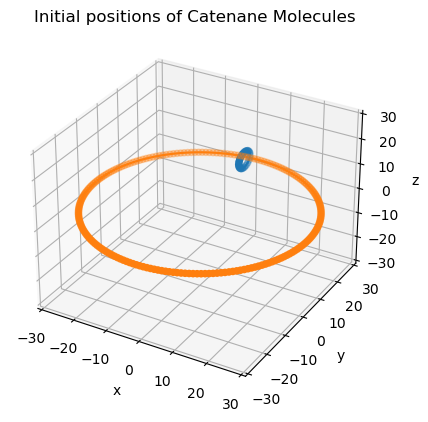

In [71]:
plt.close()
visualize_rings([p_small,p_large])



In [4]:
from openmm.app import *
from openmm import *
#from openmm.unit import *
from sys import stdout

In [8]:
pdb = PDBFile('./pdb_files/small_ring.pdb')

In [80]:
#xml_template = open("./pdb_files/forcefield.txt", "r")
#print(xml_template.read())

def generate_bond_and_atom_tags(pdb_df):
    n = len(pdb_df["Atom Name"])
    bond_tags = ""
    atom_tags = ""
    for i,atom_name in enumerate(pdb_df["Atom Name"]):
        atom_tags += f'\n\t\t\t<Atom name = {atom_name} type = "0"/>'
        if i == n-1:
            bond_tags += f'\n\t\t\t<Bond atomName1 = C{i+1} atomName2 = C{1}/>'
        else:
            bond_tags += f'\n\t\t\t<Bond atomName1 = C{i+1} atomName2 = C{i+2}/>'
    return atom_tags,bond_tags

def write_forcefield_xml(atom_tags,bond_tags):
    top_file_template = '<ForceField>\n\t<AtomTypes>\n\t\t<Type name="0" class="C" element="C" mass="1"/>\n\t</AtomTypes>\n\t<Residues>\n\t\t<Residue name="small">'
    middle_file_template = '\n\t\t</Residue>\n\t\t<Residue name="LARGE">'
    bottom_file_template = '\n\t\t</Residue>\n\t</Residues>\n</ForceField>'
    xml_file = top_file_template+small_atom_tags+small_bond_tags+middle_file_template+large_atom_tags+large_bond_tags+bottom_file_template
    OUT=open(f"./pdb_files/forcefield.xml",'w')
    OUT.write(xml_file)
    return xml_file

In [86]:
small_atom_tags,small_bond_tags = generate_bond_and_atom_tags(small_ring_pdb_df)
large_atom_tags,large_bond_tags = generate_bond_and_atom_tags(large_ring_pdb_df)
xml_file = write_forcefield_xml(atom_tags,bond_tags)

In [9]:
def addBondsToPDB(pdb):
    n_atoms = pdb.topology.getNumAtoms()
    for i in range(1,n_atoms+1):
        if i == n_atoms: 
            pdb.topology.addBond(n_atoms,i,type="single")
        else:
            pdb.topology.addBond(i,i+1,type="single")
    return pdb


flat_bottom_force = CustomBondForce('step(r-r0) * (k/2) * (r-r0)^2')
flat_bottom_force.addPerBondParameter('r0')
flat_bottom_force.addPerBondParameter('k')
#system.addForce(flat_bottom_force)


1

In [13]:


from openmm.app import app
from openmm import mm
from openmm import unit
import sys
import h5py
import numpy as np
import os

def runSim(T = 50, gamma = 1/50, len = 10, dt = 0.1, f_pdb = "pdb", 
           f_ff = "forcefield"):
    """
    Function to run the openMM simulation (NVT) with given params and 
    pdb+forcefields 
    parameters:
    T: int
        Temperature
    gamma: float
        Friction parameters for Langevin
    len: float
        Total length of the simulation in ps
    dt: float
        Size of the timesteps
    f_pdb: str
        Name of the pdb file (excluding the file extension, which should 
        simply be .pdb)
    f_ff: str
        Name of the forcefield file (excluding the file extension, which should 
        simply be .xml)
    """
    # set up strings
    # THE FOLLOWING FILE NAMES ARE PLACEHOLDERS: CHANGE WHEN POSSIBLE
    pdbPath = "pdb_files/{}.pdb".format(f_pdb)
    forcefieldPath = "pdb_files/{}.xml".format(f_ff)

    pdb = app.PDBFile(pdbPath)
    forcefield = app.ForceField(forcefieldPath)
    nonbonded = app.NoCutoff

    system = forcefield.createSystem(pdb.topology, nonbondedMethod = nonbonded,
                                    nonbondedCutoff = 1e3*unit.nanometer,
                                    constraints = None)
    
    beta = 1./T

    integrator = mm.LangevinIntegator(T*unit.kelvin, gamma, dt)
    platform = mm.Platform.getPlatformByName('Reference')
    simulation = app.Simulation(pdb.topology, system, integrator, platform)
    simulation.context.setPositions(pdb.positions)
    simulation.context.computeVirtualSites()
    simulation.context.setVelocitiesToTemperature(Temperature*unit.kelvin)

AttributeError: 'Modeller' object has no attribute 'forcefield'